In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('spam.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [9]:
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [10]:
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [11]:
# Undersamplling


In [12]:
ham1=ham.sample(spam.shape[0])
ham1.shape

(747, 4)

In [13]:
# Balance your data where target value is ham or spam
data=ham1.append(spam,ignore_index=True)
data.shape

(1494, 4)

In [14]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

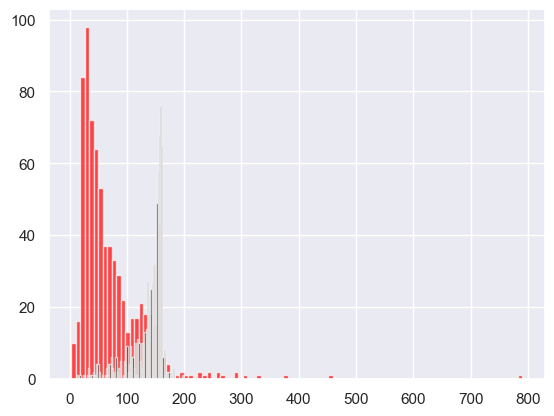

In [15]:
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7, color='red')
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7, color='black')
plt.show()

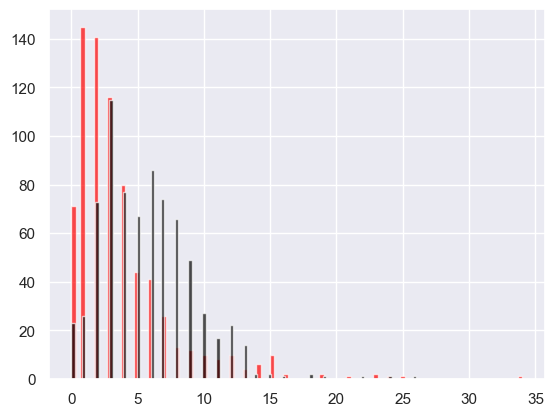

In [16]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7, color='red')
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7, color='black')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                   test_size=0.3, random_state=101)

In [18]:
x_train

1168    1st wk FREE! Gr8 tones str8 2 u each wk. Txt N...
930     You have 1 new voicemail. Please call 08719181...
1152    Xmas Offer! Latest Motorola, SonyEricsson & No...
34        Hi Harish's rent has been transfred to ur Acnt.
339         No one interested. May be some business plan.
                              ...                        
1417    You can donate £2.50 to UNICEF's Asian Tsunami...
75      Tell me they're female :V how're you throwing ...
599                           When/where do I pick you up
1361    URGENT! This is the 2nd attempt to contact U!U...
863     Orange customer, you may now claim your FREE C...
Name: message, Length: 1045, dtype: object

# Build NLP model to ensure your text variable get change into vector form

# Text Analytics by using SPAM Detection

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# pipeline package to merge NLP and Machine Learning together and get the output

from sklearn.pipeline import Pipeline

# RandomForest Classifier Algorithm

In [20]:
classifier = Pipeline([('TF-IDF', TfidfVectorizer()), 
                      ('Classifier', RandomForestClassifier())])

In [21]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [22]:
y_pred_train = classifier.predict(x_train)

y_pred_test = classifier.predict(x_test)

In [23]:
# Evaluation matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [24]:
print(confusion_matrix(y_train, y_pred_train))
print("*******************"*10)
print(confusion_matrix(y_test, y_pred_test))

[[521   0]
 [  0 524]]
**********************************************************************************************************************************************************************************************
[[224   2]
 [ 25 198]]


In [25]:
print(classification_report(y_train, y_pred_train))
print("*******************"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       521
        spam       1.00      1.00      1.00       524

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

**********************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       226
        spam       0.99      0.89      0.94       223

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [26]:
print(accuracy_score(y_train, y_pred_train))
print("*******************"*10)
print(accuracy_score(y_test, y_pred_test))

1.0
**********************************************************************************************************************************************************************************************
0.9398663697104677


# SVM

In [27]:
classifier1 = Pipeline([('TF-IDF', TfidfVectorizer()), 
                      ('Classifier', SVC())])

In [28]:
classifier1.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()), ('Classifier', SVC())])

In [29]:
# predict the model by using train and test data
y_pred_train1 = classifier1.predict(x_train)

y_pred_test1 = classifier1.predict(x_test)

In [30]:
print(accuracy_score(y_train, y_pred_train1))
print("*******************"*10)
print(accuracy_score(y_test, y_pred_test1))

0.9980861244019139
**********************************************************************************************************************************************************************************************
0.955456570155902


# RandomForest is the best model
# without balancing the data,we wanted to explore

In [44]:
df.head(20)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


In [32]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'],
                                                   test_size=0.3, random_state=101)

In [34]:
classifier_without_balance = Pipeline([('TF-IDF', TfidfVectorizer()), 
                      ('Classifier', RandomForestClassifier())])

In [35]:
classifier_without_balance.fit(x_train, y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [36]:
y_pred_train3 = classifier_without_balance.predict(x_train)

y_pred_test3 = classifier_without_balance.predict(x_test)

In [37]:
print(accuracy_score(y_train, y_pred_train3))
print("*******************"*10)
print(accuracy_score(y_test, y_pred_test3))

1.0
**********************************************************************************************************************************************************************************************
0.9754784688995215


In [38]:
print(classification_report(y_train, y_pred_train3))
print("*******************"*10)
print(classification_report(y_test, y_pred_test3))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3350
        spam       1.00      1.00      1.00       550

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900

**********************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1475
        spam       1.00      0.79      0.88       197

    accuracy                           0.98      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.98      0.97      1672



In [43]:
classifier_without_balance.predict(['Free entry in 2 a wkly comp to win FA Cup final'])

array(['ham'], dtype=object)